# PROBABILITY STATISTICS ASSIGNMENT 1

## Q1

$$ Binomial \to\ ^nC_x\ p^x\ (1-p)^{n-x} $$
$$=\lim_{x \to \infty}\ ^nC_x\ p^x\ (1-p)^{n-x}$$
$$=\lim_{x \to \infty}\ \frac{n(n-1)...1}{x!\ (n-x)(n-x-1)...1}\left(\frac{\lambda}{n}\right)^x\left(1-\frac{\lambda}{n}\right)^n\left(1-\frac{\lambda}{n}\right)^{-x}$$
$$=\lim_{x \to \infty}\ \frac{n(n-1)...(n-x-1)}{x!}\frac{\lambda^x}{n^x}\left(1-\frac{\lambda}{n}\right)^n\left(1-\frac{\lambda}{n}\right)^{-x}$$
$$=\lim_{x \to \infty}\ \frac{(1-\frac{1}{n})...(1-\frac{(x-1)}{n})}{x!}\lambda^x\left(1-\frac{\lambda}{n}\right)^n\left(1-\frac{\lambda}{n}\right)^{-x}$$
$$=\frac{(1)(1)(1)....(1)}{x!}\lambda^x\ e^{-\lambda}$$
$$=\frac{\lambda^x}{x!}\ e^{-\lambda}\ \to Poisson$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.stats import poisson, binom
def poisson_pmf(k, lambda_):
        return poisson.pmf(k, lambda_)
def poison(lambda_):
    k_interp = np.linspace(0, 10, 1000)
    k_values = np.arange(0, 10)
    pmf_values = [poisson_pmf(k, lambda_) for k in k_values]
    pmf_smooth = make_interp_spline(k_values, pmf_values)(k_interp)
    plt.figure(figsize=(10, 3))    
    plt.plot(k_interp, pmf_smooth, label=f'Poisson Distribution (λ={lambda_})')
    plt.xlabel('Number of occurrences (k)')
    plt.ylabel('Probability')
    plt.title('Poisson Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()


In [2]:
# def binomial_pmf(n, k, p):
#         binomial_coeff = math.comb(n, k) 
#         return binomial_coeff * (p**k) * ((1 - p)**(n - k))
# def binomial_pmf(n, k, p):
#     log_binom_coeff = math.log(math.comb(n, k))  # Logarithm of n choose k
#     log_pmf = log_binom_coeff + k * math.log(p) + (n - k) * math.log(1 - p)
#     return math.exp(log_pmf)
def binomial(n,p):
    lambda_ = n * p
    std_dev = np.sqrt(n * p * (1 - p))
    k_min = int(max(0, lambda_ - 5 * std_dev))
    k_max = int(lambda_ + 5 * std_dev)
    k_values = np.arange(k_min, k_max + 1)    
    pmf_values = [binom.pmf(k,n, p) for k in k_values]
    plt.figure(figsize=(5, 3))    
    plt.bar(k_values, pmf_values,label=f'Binomial Distribution (n={n}, p={p})')
    plt.xlabel('Number of successes')
    plt.ylabel('Probability')
    plt.title('Binomial Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()


In [3]:
def compare(n,p):
    lambda_ = n * p
    std_dev = np.sqrt(n * p * (1 - p))
    k_min = int(max(0, lambda_ - 5 * std_dev))
    k_max = int(lambda_ + 5 * std_dev)
    k_values = np.arange(k_min, k_max + 1)    
    
    binomial_pmf_values = [binom.pmf(k,n, p) for k in k_values]
    # Poisson PMF values
    poisson_pmf_values = [poisson.pmf(k, lambda_) for k in k_values]
    poison(lambda_)
    binomial(n,p)
    accuracy_metric_mse =np.mean((np.array(binomial_pmf_values) - np.array(poisson_pmf_values))**2)
    print("accuracy metric mean squared error=",accuracy_metric_mse)

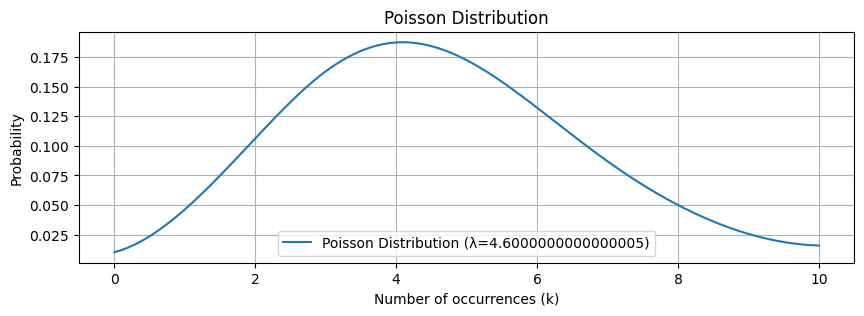

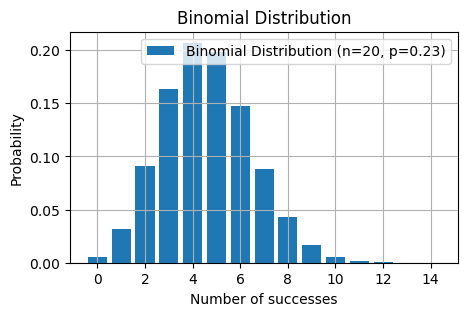

accuracy metric mean squared error= 0.000126670551257153


In [4]:
#i)
compare(20,0.23)

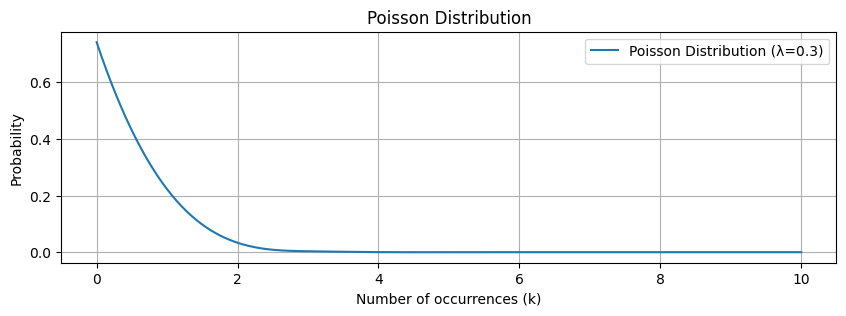

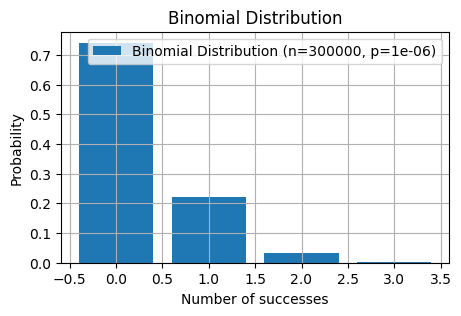

accuracy metric mean squared error= 1.276205997963873e-14


In [5]:
#ii)
compare(3*10**5,10**-6)

Analysis: When in example (i) we have taken normal values of n and p so the binomial and poisson distribution are different from each other but in example (ii) we have naken n --> inf and p-->0 so that the binomial distribution tends to poisson distribution as we can see from graphs 

## Q3

$$Using\ Chebyshev's\ inequaliy\  \to\ P(\left|\bar{x}-\mu \right|\geq k\sigma)\leq\frac{1}{k^2}$$
$$if \ \  k\sigma = \epsilon \to k=\frac{\epsilon}{\sigma}$$
$$then \ \ P(\left|\bar{x}-\mu \right|\geq \epsilon)\leq\frac{\sigma^2}{\epsilon^2}$$
$$ now \ \  var(\bar{x})=\frac{\sigma^2}{n}$$
$$so\ \  P(\left|\bar{x}-\mu \right|\geq \epsilon)\leq\frac{\sigma^2_x}{\epsilon^2n}\ \to\ 0 \ as\  n\ \to \  \ \infty$$
$$ Hence Proved$$

## Q4

In [6]:
data = {'2':2/14,'3':3/14,'1':1/14,'1':1/14,'6':6/14,'0':0/14,'1':1/14,'0':0/14}
import pandas as pd 
df = pd.DataFrame(data ,index=['P(X) = x'])

In [7]:
df

,2,3,1,6,0
P(X) = x,0.142857,0.214286,0.071429,0.428571,0.0


In [22]:
ListOfMeans = []
import random
for i in range(10000):
    sample = [random.choice([2,3,1,1,6,0,1,0]) for _ in range(10000)]
    ListOfMeans.append(pd.Series(sample).mean())


In [ ]:
#seaborn not available so used plt

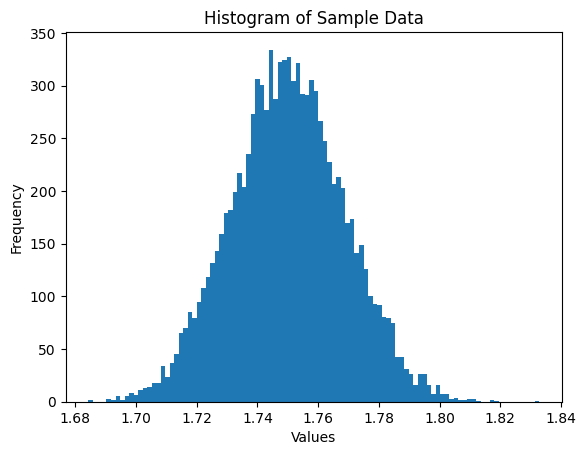

In [21]:
plt.hist(ListOfMeans,bins=100)
plt.title('Histogram of Sample Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

The graph is near to the normal distribution and it doesnot depend on orignal distribution beacause of then large samples

In [28]:
print("Mean of Original Distribution:",51/14)
print("Standard deviation of Original Distribution:",1.673)
print("According to CLT")
print("Mean of new Distribution:u=",51/14)
print("Standard deviation of new Distribution:sigma/rt(n)=",1.67312)
print("so these values are close ")

Mean of Original Distribution: 3.642857142857143
Standard deviation of Original Distribution: 1.673
According to CLT
Mean of new Distribution:u= 3.642857142857143
Standard deviation of new Distribution:sigma/rt(n)= 1.67312
so these values are close 


# Q5

$$ To\  Check\  for\  independence\ $$
$$P(X=x,Y=y)=P(X=x)P(Y=y)$$
$$1\ = \left(\int_{0}^{e^{-x}}dy\right)\left(\int_{0}^{\infty}dx\right)$$
$$ \neq 1$$
So x and y not independent

$$P(X|Y)=\frac{P(X,Y)}{P(Y)}$$
$$\ \ \ = \frac{1}{e^{-x}}$$
$$\ \ \ = e^x$$

Yes we can say that x and y are independent because we know that y is bounded on x range so intuitively we can say that x and y not independent

# Q6

$As\ \ nothing\ \  is\ \ given\ \ about\ \ confidence\ \ interval\ \ we\ \ can\ \ assume\ \ $ 
$$\alpha =0.05$$
$$ \bar{X}=4.97\ , \ \mu=np=10*0.5=5 \ ,\ \sigma=\sqrt{n*p*(1-p)}=\sqrt{10*0.5*0.5}=\sqrt{2.5}  $$


$$ Z_\frac{\alpha}{2}=1.96 $$
$$ -1.96<\frac{\bar{X}- \mu}{\left(\frac{\sigma}{\sqrt{n}}\right)}<1.96$$
$$ -1.96<\frac{4.97- 5}{\left(\frac{\sqrt{2.5}}{\sqrt{100}}\right)}<1.96 $$
$$ -1.96<-0.189<1.96 $$

So Null Hypothesis can not be rejected  

We can not take p= 4.97 so as for the first choice of p we take p=0.5 to minimize the biaz because no prior info is given 